In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_route = {
    'masam': [pd.read_csv("data/soc/obd/hong/masam/19.csv"),
              pd.read_csv("data/soc/obd/hong/masam/3.csv"),
              pd.read_csv("data/soc/obd/hong/masam/5.csv")],
    'masam-joomin': [pd.read_csv("data/soc/obd/hong/masam-joomin/6.csv")],
    'masam-sageun': [pd.read_csv("data/soc/obd/hong/masam-sageun/1.csv"),
                     pd.read_csv("data/soc/obd/hong/masam-sageun/15.csv")],
    'masam-_joomin-joomin': [pd.read_csv("data/soc/obd/hong/masam-_joomin-joomin/13.csv")],
    'masam-_joomin-_sageun': [pd.read_csv("data/soc/obd/hong/masam-_joomin-_sageun/12.csv")],
    'masam-joomin-ramp': [pd.read_csv("data/soc/obd/hong/masam-joomin-ramp/11.csv"),
                          pd.read_csv("data/soc/obd/hong/masam-joomin-ramp/18.csv")],
    'masam-joomin-sageun': [pd.read_csv("data/soc/obd/hong/masam-joomin-sageun/2.csv"),
                            pd.read_csv("data/soc/obd/hong/masam-joomin-sageun/4.csv"),
                            pd.read_csv("data/soc/obd/hong/masam-joomin-sageun/10.csv"),
                            pd.read_csv("data/soc/obd/hong/masam-joomin-sageun/14.csv"),
                            pd.read_csv("data/soc/obd/hong/masam-joomin-sageun/16.csv")],
    'masam-ramp-sageun': [pd.read_csv("data/soc/obd/hong/masam-ramp-sageun/7.csv"),
                          pd.read_csv("data/soc/obd/hong/masam-ramp-sageun/8.csv")],
    'masam-_joomin-joomin-sageun': [pd.read_csv("data/soc/obd/hong/masam-_joomin-joomin-sageun/17.csv")]
}

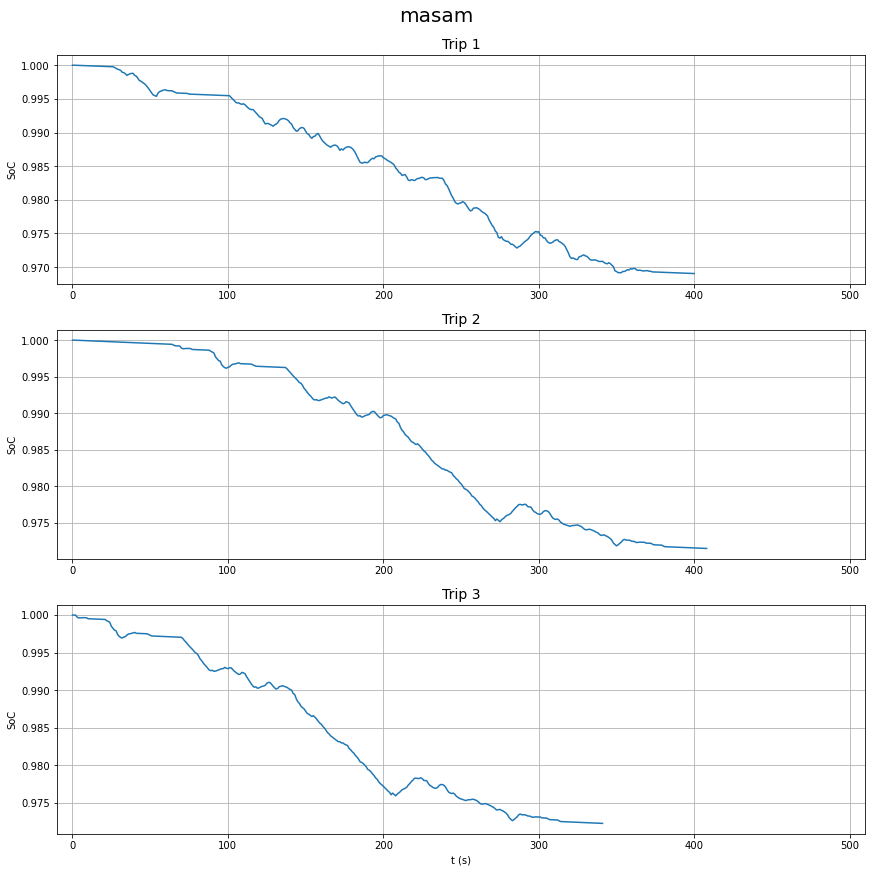

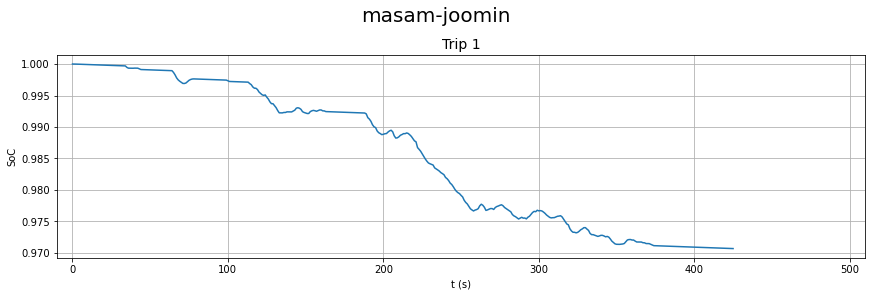

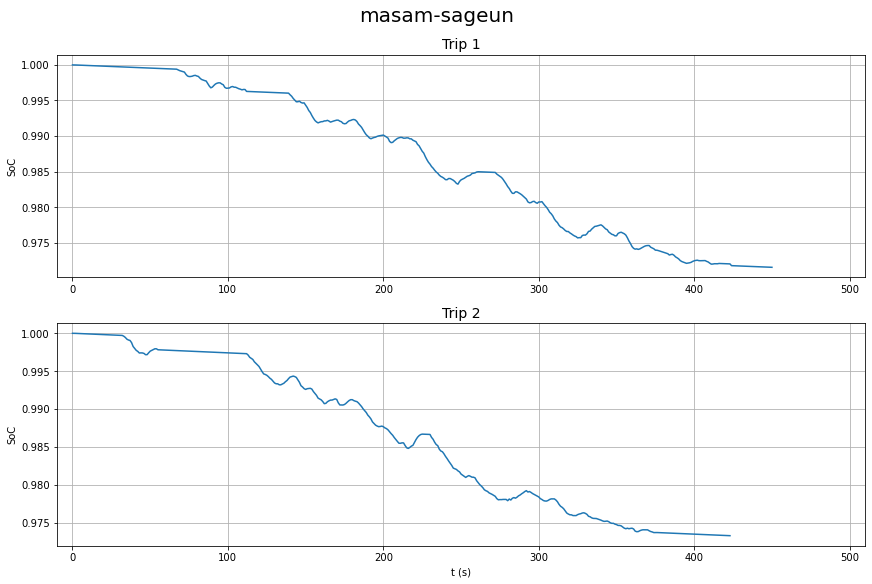

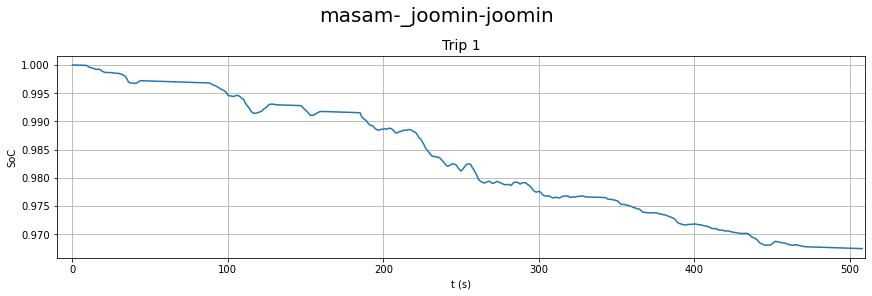

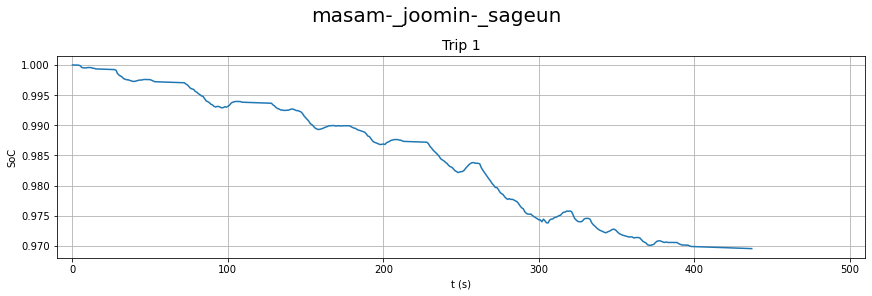

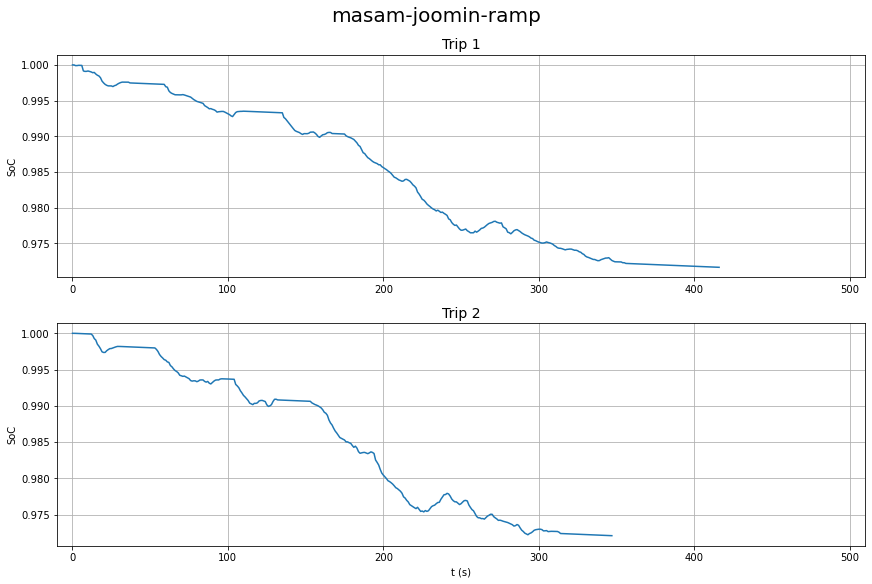

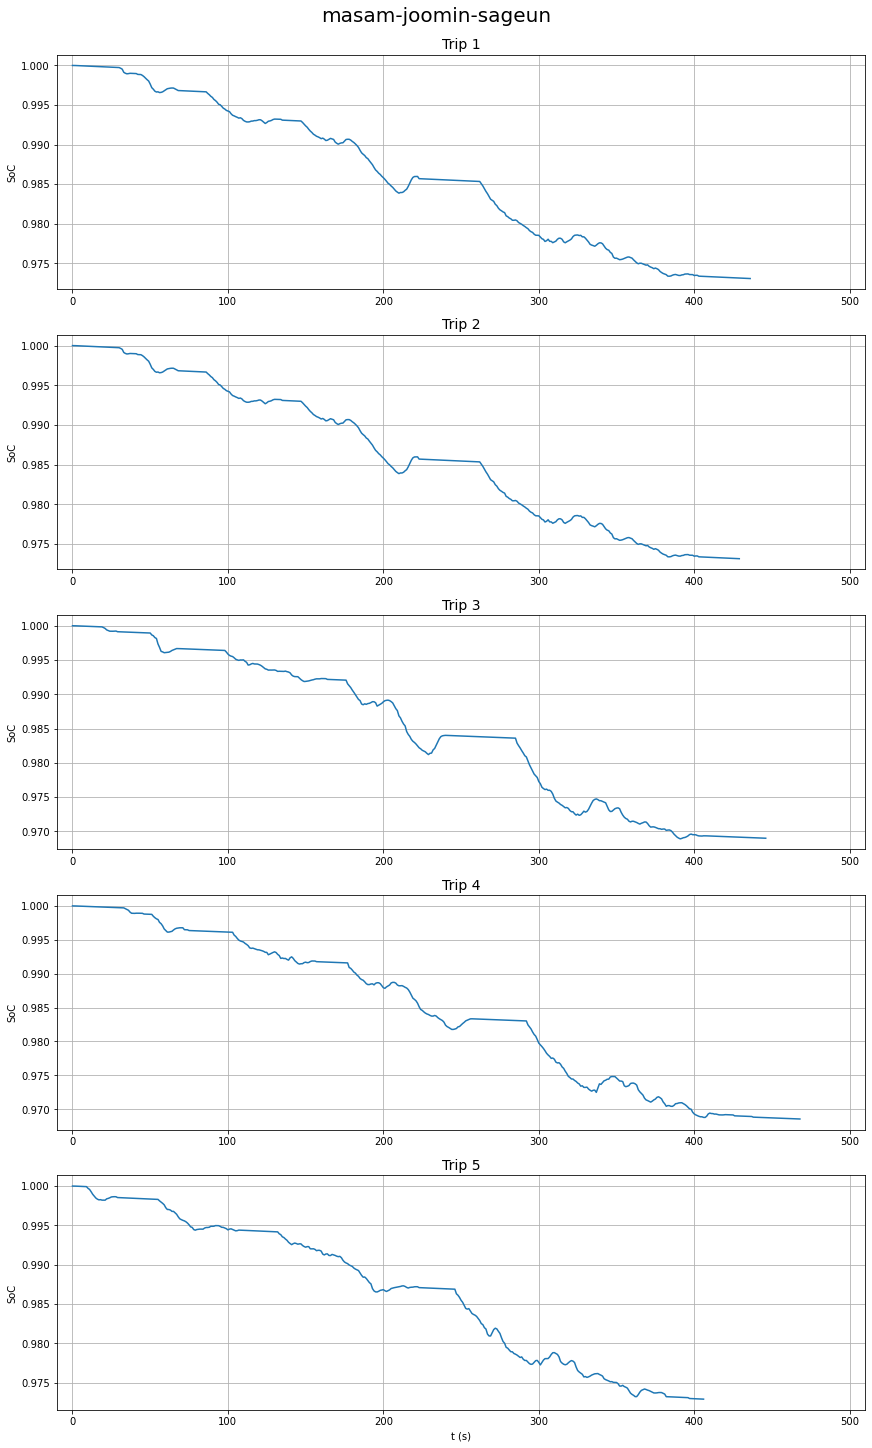

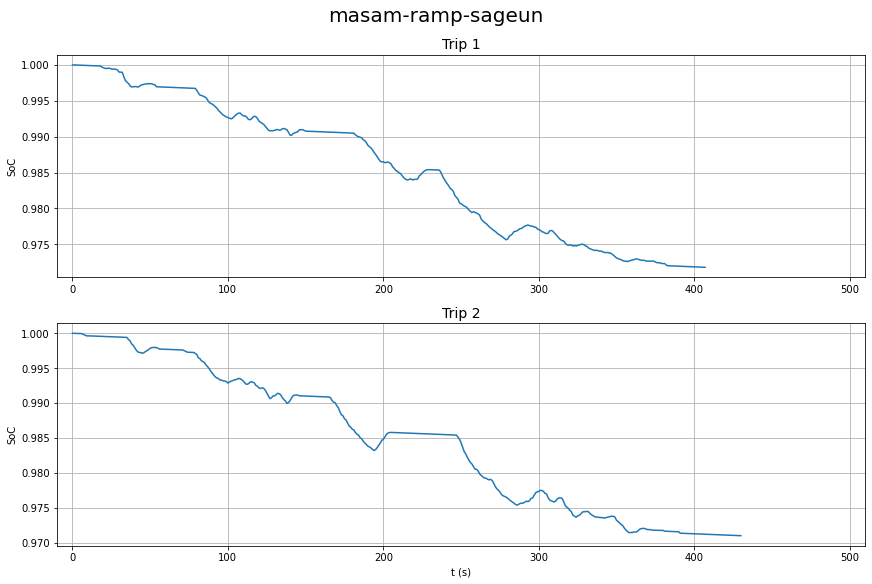

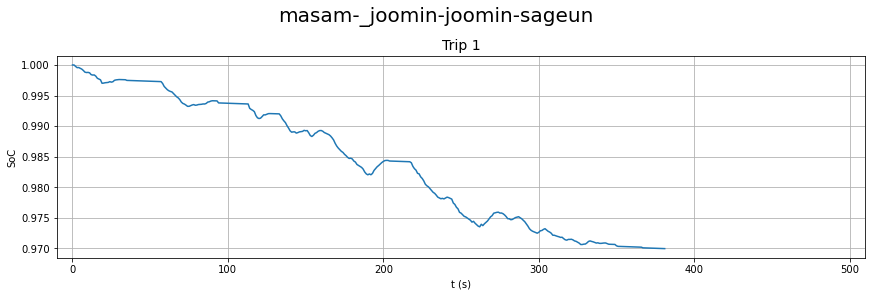

In [23]:
for name, routes in df_route.items():
    rows = len(routes)
    fig, axs = plt.subplots(rows, 1, figsize=(12, 4 * rows), constrained_layout=True)
    fig.suptitle(name, fontsize=20)

    for i in range(rows):
        if rows == 1:
            axs.plot('Soc', data=routes[i])
            axs.set_title("Trip " + str(i + 1), fontsize=14)
            axs.set_ylabel('SoC')
            axs.grid(True)
            axs.set_xlim(-10, 510)
        else:
            axs[i].plot('Soc', data=routes[i])
            axs[i].set_title("Trip " + str(i + 1), fontsize=14)
            axs[i].set_ylabel('SoC')
            axs[i].grid(True)
            axs[i].set_xlim(-10, 510)
        
    plt.xlabel('t (s)')
    plt.show()

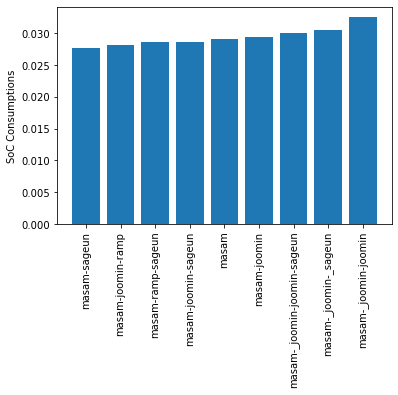

In [82]:
# soc_consumption_per_secs = []
soc_consumptions = []
avg_time_steps = []

for name, routes in df_route.items():
    time_steps = np.array([])
    soc_consumption = np.array([])
    for route in routes:
        s = route['Soc'].to_numpy()
        time_steps = np.append(time_steps, s.size)
        soc_consumption = np.append(soc_consumption, 1 - s[-1])
    
#     soc_consumption_per_sec = soc_consumption / steps
#     soc_consumption_per_secs.append(soc_consumption_per_sec.mean())
    soc_consumptions.append(soc_consumption.mean())
    avg_time_steps.append(time_steps.mean())

# zipped = zip(df_route.keys(), avg_time_steps, soc_consumption_per_secs)
zipped = zip(df_route.keys(), avg_time_steps, soc_consumptions)
zipped_sorted = sorted(zipped, key=lambda e: e[2])
# route_names_sorted, avg_time_steps_sorted, soc_consumption_per_secs_sorted = zip(*zipped_sorted)
route_names_sorted, avg_time_steps_sorted, soc_consumptions_sorted = zip(*zipped_sorted)

x = np.arange(len(route_names_sorted))
# plt.ylabel("SoC Consumption Per Second")
plt.ylabel("SoC Consumptions")
# plt.bar(x, soc_consumption_per_secs_sorted)
plt.bar(x, soc_consumptions_sorted)
plt.xticks(ticks=x, labels=route_names_sorted, rotation=90)
plt.show()

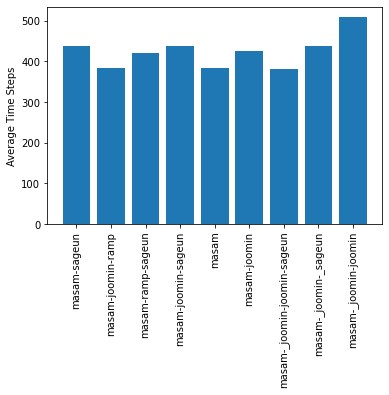

In [83]:
plt.ylabel("Average Time Steps")
plt.bar(x, avg_time_steps_sorted)
plt.xticks(ticks=x, labels=route_names_sorted, rotation=90)
plt.show()